<a href="https://colab.research.google.com/github/JosegSuarezb/Integracion-de-los-datos/blob/main/Reto_2_Jose_Gregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Muestreo de Variables Aleatorias y Confiabilidad**

Una empresa del sector asegurador ha creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización. De acuerdo con la base de datos, la empresa quiere llevar a cabo el proceso de muestreo de la distribución agregada de pérdidas mediante la utilización del método de Montecarlo, utilizando para ello diferentes niveles de confiabilidad (99%,99,9%,99,99%).

#Cargamos librerias y aplicamos def metricas para que nos saque todos los calculos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import random as rnd #Libreria para los números aleatorios

Mounted at /content/drive


In [ ]:
def metricas(LDA):

  counts,bin_edges=np.histogram(LDA,bins=10)

  LI=bin_edges[:-1] #limite inferiores
  LS=bin_edges[1:]  #limite superiores
  mc=(LI+LS)/2      #Medias de clase

  pdf=counts/sum(counts) #nos entrega la ruleta
                        #porcentaje de datos por intervalo

  fp=pdf

  cdf=np.cumsum(pdf)     #construimos la ruleta
                        #el acumulado de las probabilidades


  #2. se procede con el calculo de las medidas de tendencia central
  #Media, Varianza, coeficiente de asimetria, kurtosis
  u=np.sum(np.multiply(mc,fp))

  #3. Desviacion - Estandar (Varianza)
  var=np.sum(np.multiply((mc-u)**2,fp)) #suma producto del excel
  std=np.sqrt(var)

  #1. error del muestreo
  error_muestreo = std / np.sqrt(len(LDA))  # std es la desviación estándar, LDA son los datos

  #4. Coeficiente de asimetria
  cas=np.sum(np.multiply(((mc-u)/std)**3,fp))

  #5. coeficiente de kurtosis
  ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
  ck=ck-3

  return LI,LS,mc,fp,cdf,u,std,error_muestreo,cas,ck,counts,bin_edges

In [ ]:
def tipodist(cas,ck):

  if abs(cas)<0.5 and abs(ck)<0.5:
    print("Posible distribucion normal")
  elif cas>0 and ck>3:
    if ck>=8:
      print("Posible distribucion exponencial")
    elif ck>=6:
      print("Posible distribucion gamma")
    else:
      print("Posible distribucion Weibull")
  elif cas<0 and ck>3:
    print("Posible distribucion beta")
  elif ck<3:
    print("Posible distribucion uniforme")
  else:
    print("No se puede determinar la distribucion")

#Cargamos base de datos y los evaluamos

In [ ]:
nxl='/content/drive/MyDrive/Integracion de datos (enfasis)/6.3 AdmonEjecProcesos.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0)
XDB.head(100)

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas,Valor Generado (millones)
0,2010-01-01,44,358.3637,5,0.079029
1,2010-01-02,43,742.8517,7,0.021259
2,2010-01-03,55,646.6903,9,0.038818
3,2010-01-04,59,653.5397,3,0.035956
4,2010-01-05,52,636.6142,4,0.204951
...,...,...,...,...,...
95,2010-04-06,50,441.8036,10,0.206232
96,2010-04-07,48,552.9503,7,0.019812
97,2010-04-08,58,453.7787,6,0.054705
98,2010-04-09,49,596.0837,6,0.006537


Las perdidas esperadas son:
 1.469187040102234
las perdidas no esperadas son:
 0.734593520051117
el valor de las perdidas catastroficas:
 0.0


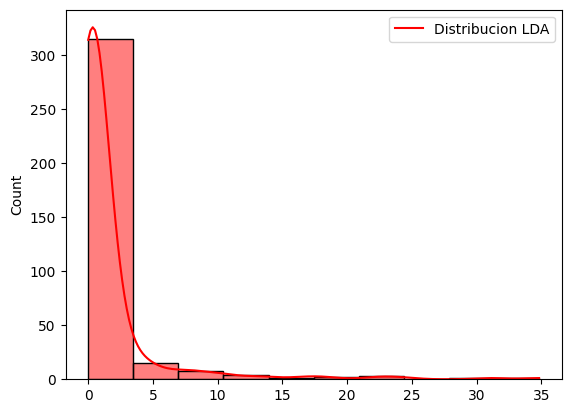

In [ ]:
Xf=XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA=Xf*Xs

u=np.mean(LDA) #limite superior perdidas esperadas (zona1)
OpVar=np.percentile(LDA,0.999) #valor asegurado OpVar (zona3)
PNE=(u+OpVar)/2 #perdidas esperadas (zona2)

print('Las perdidas esperadas son:\n',u)
print('las perdidas no esperadas son:\n',PNE)
print('el valor de las perdidas catastroficas:\n',OpVar)

plt.figure()
sns.histplot(LDA, bins=10,kde=True, color='red')
plt.legend(['Distribucion LDA'])
plt.show()

In [ ]:
res0=metricas(LDA)
print( 'limites inferiores:',res0[0]); LI=res0[0]
print( 'Limites superiores:',res0[1]);LS=res0[1]
print('Marcas de Clase:\n:',res0[2]);mc=res0[2]
print('El numero de datos por intervalo es;',res0[10]);NDI=res0[10]
print('El error del muestreo es:', res0[7])
print('Media:',res0[5]);u=res0[5]
print('Desviacion Estandar:',res0[6])
print('Coeficiente de asimetria:',res0[8]);cas=res0[8]
print('Coeficiente de kurtosis:',res0[9]);ck=res0[9]
pdf=res0[3]
cdf=res0[4]

tipodist(cas,ck)



limites inferiores: [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
Limites superiores: [ 3.48221562  6.96443124 10.44664686 13.92886248 17.4110781  20.89329372
 24.37550933 27.85772495 31.33994057 34.82215619]
Marcas de Clase:
: [ 1.74110781  5.22332343  8.70553905 12.18775467 15.66997029 19.15218591
 22.63440152 26.11661714 29.59883276 33.08104838]
El numero de datos por intervalo es; [315  15   8   4   1   2   3   0   1   1]
El error del muestreo es: 0.19338752022575958
Media: 2.656433058055811
Desviacion Estandar: 3.6179492178130417
Coeficiente de asimetria: 5.313307467317224
Coeficiente de kurtosis: 31.735556826670006
Posible distribucion exponencial


In [ ]:
df=pd.DataFrame(np.column_stack((LI,LS,mc,NDI,pdf,cdf)))
df.columns=['LI','LS','mc','NDI','pdf','cdf']
df.head(10)

,LI,LS,mc,NDI,pdf,cdf
0,0.000000,3.482216,1.741108,315.0,0.900000,0.900000
1,3.482216,6.964431,5.223323,15.0,0.042857,0.942857
2,6.964431,10.446647,8.705539,8.0,0.022857,0.965714
3,10.446647,13.928862,12.187755,4.0,0.011429,0.977143
4,13.928862,17.411078,15.669970,1.0,0.002857,0.980000
5,17.411078,20.893294,19.152186,2.0,0.005714,0.985714
6,20.893294,24.375509,22.634402,3.0,0.008571,0.994286
7,24.375509,27.857725,26.116617,0.0,0.000000,0.994286
8,27.857725,31.339941,29.598833,1.0,0.002857,0.997143
9,31.339941,34.822156,33.081048,1.0,0.002857,1.000000


#Muestreo confiabilidad 99%

los numeros muestreados son:
 [[1.13304644e+00]
 [3.46767052e+00]
 [1.77629670e+00]
 [1.29590573e+00]
 [4.88835513e+00]
 [7.85148938e-01]
 [1.39660422e+00]
 [9.71959844e-01]
 [4.26446972e-01]
 [3.63527616e-01]
 [5.62202940e+00]
 [3.04045450e+00]
 [1.60102716e+00]
 [1.29871500e+00]
 [8.94729064e-01]
 [1.07725938e+01]
 [3.60709292e+00]
 [1.52194565e+00]
 [7.76352051e-01]
 [1.55545107e+00]
 [3.08301255e-01]
 [2.13730812e+00]
 [1.09958172e+00]
 [3.26677714e+00]
 [2.91670205e+00]
 [4.28092343e-02]
 [5.36501856e-01]
 [1.97009787e+00]
 [2.86903632e+00]
 [1.65637885e+00]
 [1.23506361e+01]
 [1.15807811e+00]
 [3.20325596e+01]
 [6.57983409e+00]
 [3.03104247e+00]
 [1.79464831e-01]
 [7.52396252e+00]
 [3.86743013e-01]
 [1.49290435e+00]
 [3.63329791e+00]
 [1.31271239e+00]
 [4.23052321e-01]
 [8.46580643e-01]
 [1.74651711e+00]
 [1.70542364e+00]
 [3.59176645e+00]
 [1.75851006e+00]
 [1.57029049e-01]
 [1.32131571e+00]
 [1.28354630e+00]
 [2.28373821e+00]
 [1.06767283e+00]
 [3.85994403e-03]
 [1.28784584e+00

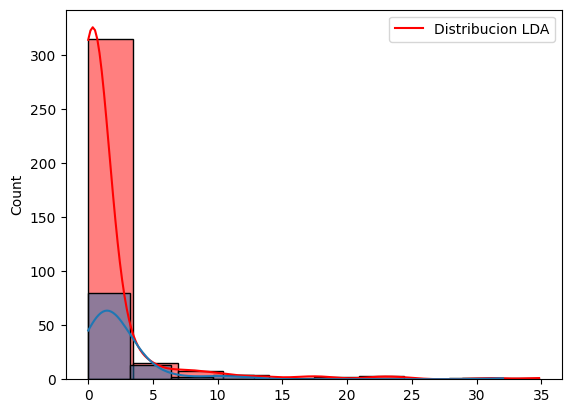

limites inferiores: [3.85994403e-03 3.20672991e+00 6.40959987e+00 9.61246983e+00
 1.28153398e+01 1.60182098e+01 1.92210797e+01 2.24239497e+01
 2.56268196e+01 2.88296896e+01]
Limites superiores: [ 3.20672991  6.40959987  9.61246983 12.81533979 16.01820975 19.22107971
 22.42394968 25.62681964 28.8296896  32.03255956]
Marcas de Clase:
: [ 1.60529492  4.80816489  8.01103485 11.21390481 14.41677477 17.61964473
 20.82251469 24.02538466 27.22825462 30.43112458]
El numero de datos por intervalo es; [80 13  2  4  0  0  0  0  0  1]
El error del muestreo es: 0.35602316461850736
Media: 2.822385510247197
Desviacion Estandar: 3.5602316461850734
Coeficiente de asimetria: 5.2397086083421485
Coeficiente de kurtosis: 34.512020587887896
Posible distribucion exponencial


,LI,LS,mc,NDI,pdf,cdf
0,0.00386,3.20673,1.605295,80.0,0.80,0.80
1,3.20673,6.40960,4.808165,13.0,0.13,0.93
2,6.40960,9.61247,8.011035,2.0,0.02,0.95
3,9.61247,12.81534,11.213905,4.0,0.04,0.99
4,12.81534,16.01821,14.416775,0.0,0.00,0.99
5,16.01821,19.22108,17.619645,0.0,0.00,0.99
6,19.22108,22.42395,20.822515,0.0,0.00,0.99
7,22.42395,25.62682,24.025385,0.0,0.00,0.99
8,25.62682,28.82969,27.228255,0.0,0.00,0.99
9,28.82969,32.03256,30.431125,1.0,0.01,1.00


In [ ]:
TI=LS[0]-LI[0]

#confiabilidad del 99% - 100 datos
LDAm=np.zeros((100,1))

for i in range(100):
  #print('Interaccion:',i)
  aleatorio=rnd.random()
  #print('El numero aleatorio es:',aleatorio)
  #print('La lista numero es:\n',cdf)
  #print((aleatorio<cdf))
  intervalo=np.array(np.where(aleatorio<cdf))
  #print('El intervalo de trabajo es:', intervalo[0,0])
  #print('Los limites inferiores son:\n',LI)
  aleatorio2=rnd.random()
  #print('El intervalo seleccionado es:',LI[intervalo[0,0]])
  LDAm[i]=LI[intervalo[0,0]]+TI*aleatorio2
  #print('El valor muestreado es:',LDAm[i])

print('los numeros muestreados son:\n',LDAm)

plt.figure()
sns.histplot(LDA, bins=10,kde=True, color='red')
sns.histplot(LDAm,bins=10,kde=True, color='blue')
plt.legend(['Distribucion LDA'])
plt.show()

res1=metricas(LDAm)
print( 'limites inferiores:',res1[0]); LI=res1[0]
print( 'Limites superiores:',res1[1]);LS=res1[1]
print('Marcas de Clase:\n:',res1[2]);mc=res1[2]
print('El numero de datos por intervalo es;',res1[10]);NDI=res1[10]
print('El error del muestreo es:', res1[7])
print('Media:',res1[5]);u=res1[5]
print('Desviacion Estandar:',res1[6])
print('Coeficiente de asimetria:',res1[8]);cas=res1[8]
print('Coeficiente de kurtosis:',res1[9]);ck=res1[9]
pdf=res1[3]
cdf=res1[4]
tipodist(cas,ck)
df=pd.DataFrame(np.column_stack((LI,LS,mc,NDI,pdf,cdf)))
df.columns=['LI','LS','mc','NDI','pdf','cdf']
df.head(10)

#Muestreo confiabilidad 99,9%

los numeros muestreados son:
 [[2.43059467e+00]
 [2.26094499e+00]
 [1.13493672e+00]
 [2.19871784e+00]
 [3.04166723e+01]
 [1.00743030e+00]
 [1.15842881e+00]
 [2.55892960e+00]
 [1.24786553e-01]
 [2.04185393e+00]
 [1.81010519e+00]
 [1.71752088e+00]
 [1.32386144e+00]
 [2.97691025e+00]
 [2.77682327e+00]
 [5.20393489e+00]
 [1.38961997e-01]
 [2.88758660e+00]
 [1.37719221e+00]
 [9.36471899e-01]
 [4.70151992e+00]
 [2.17290450e+00]
 [5.46403217e+00]
 [6.38673450e-01]
 [2.85128152e+00]
 [1.02419137e+00]
 [2.73869765e+00]
 [8.08221429e-01]
 [3.05747913e+00]
 [8.25332563e-01]
 [3.14928397e+00]
 [2.79194047e+00]
 [2.59734934e+00]
 [1.10244606e+00]
 [1.09966155e+00]
 [1.99654622e+00]
 [1.03538748e+00]
 [1.77972981e+00]
 [2.91596778e+00]
 [2.48550793e+00]
 [5.05742987e+00]
 [6.97775567e-01]
 [1.25588999e+01]
 [3.03451621e+00]
 [3.55311293e-01]
 [1.03062522e+00]
 [1.27557923e+01]
 [3.12235366e+00]
 [3.05200258e+00]
 [2.02435790e+00]
 [1.12907953e+01]
 [1.14120675e+00]
 [2.93667797e+00]
 [6.40182719e+00

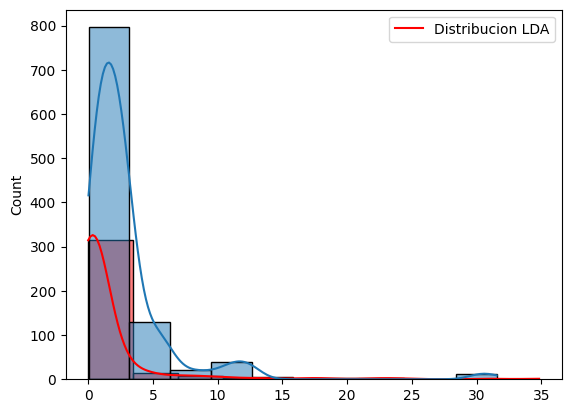

limites inferiores: [2.35586223e-02 3.17540108e+00 6.32724354e+00 9.47908599e+00
 1.26309284e+01 1.57827709e+01 1.89346134e+01 2.20864558e+01
 2.52382983e+01 2.83901407e+01]
Limites superiores: [ 3.17540108  6.32724354  9.47908599 12.63092845 15.7827709  18.93461336
 22.08645582 25.23829827 28.39014073 31.54198319]
Marcas de Clase:
: [ 1.59947985  4.75132231  7.90316476 11.05500722 14.20684968 17.35869213
 20.51053459 23.66237705 26.8142195  29.96606196]
El numero de datos por intervalo es; [796 130  20  38   5   0   0   0   0  11]
El error del muestreo es: 0.1162594591544689
Media: 2.869672360499106
Desviacion Estandar: 3.6764469046743518
Coeficiente de asimetria: 5.005879058526855
Coeficiente de kurtosis: 30.93465662856977
Posible distribucion exponencial


,LI,LS,mc,NDI,pdf,cdf
0,0.023559,3.175401,1.599480,796.0,0.796,0.796
1,3.175401,6.327244,4.751322,130.0,0.130,0.926
2,6.327244,9.479086,7.903165,20.0,0.020,0.946
3,9.479086,12.630928,11.055007,38.0,0.038,0.984
4,12.630928,15.782771,14.206850,5.0,0.005,0.989
5,15.782771,18.934613,17.358692,0.0,0.000,0.989
6,18.934613,22.086456,20.510535,0.0,0.000,0.989
7,22.086456,25.238298,23.662377,0.0,0.000,0.989
8,25.238298,28.390141,26.814220,0.0,0.000,0.989
9,28.390141,31.541983,29.966062,11.0,0.011,1.000


In [ ]:
TI=LS[0]-LI[0]

#confiabilidad del 99% - 100 datos
LDAm2=np.zeros((1000,1))

for i in range(1000):
  #print('Interaccion:',i)
  aleatorio=rnd.random()
  #print('El numero aleatorio es:',aleatorio)
  #print('La lista numero es:\n',cdf)
  #print((aleatorio<cdf))
  intervalo=np.array(np.where(aleatorio<cdf))
  #print('El intervalo de trabajo es:', intervalo[0,0])
  #print('Los limites inferiores son:\n',LI)
  aleatorio2=rnd.random()
  #print('El intervalo seleccionado es:',LI[intervalo[0,0]])
  LDAm2[i]=LI[intervalo[0,0]]+TI*aleatorio2
  #print('El valor muestreado es:',LDAm[i])

print('los numeros muestreados son:\n',LDAm2)

plt.figure()
sns.histplot(LDA, bins=10,kde=True, color='red')
sns.histplot(LDAm2,bins=10,kde=True, color='blue')
plt.legend(['Distribucion LDA'])
plt.show()

res2=metricas(LDAm2)
print( 'limites inferiores:',res2[0]); LI=res2[0]
print( 'Limites superiores:',res2[1]);LS=res2[1]
print('Marcas de Clase:\n:',res2[2]);mc=res2[2]
print('El numero de datos por intervalo es;',res2[10]);NDI=res2[10]
print('El error del muestreo es:', res2[7])
print('Media:',res2[5]);u=res2[5]
print('Desviacion Estandar:',res2[6])
print('Coeficiente de asimetria:',res2[8]);cas=res2[8]
print('Coeficiente de kurtosis:',res2[9]);ck=res2[9]
pdf=res2[3]
cdf=res2[4]
tipodist(cas,ck)
df=pd.DataFrame(np.column_stack((LI,LS,mc,NDI,pdf,cdf)))
df.columns=['LI','LS','mc','NDI','pdf','cdf']
df.head(10)

#Muestreo confiabilidad 99,99%

los numeros muestreados son:
 [[2.01659817]
 [2.4201974 ]
 [0.07965965]
 ...
 [1.15378286]
 [1.85547591]
 [2.7638805 ]]


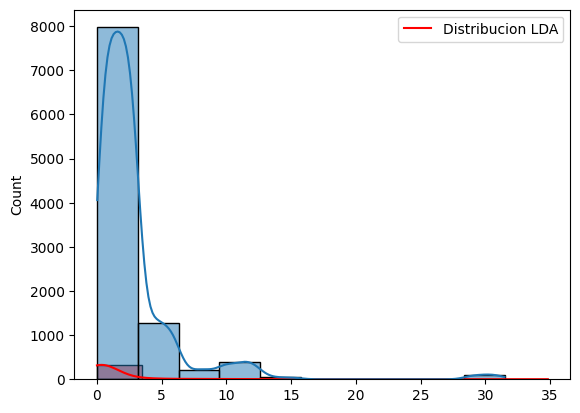

limites inferiores: [2.35953660e-02 3.16878871e+00 6.31398206e+00 9.45917540e+00
 1.26043688e+01 1.57495621e+01 1.88947554e+01 2.20399488e+01
 2.51851421e+01 2.83303355e+01]
Limites superiores: [ 3.16878871  6.31398206  9.4591754  12.60436875 15.7495621  18.89475544
 22.03994879 25.18514214 28.33033548 31.47552883]
Marcas de Clase:
: [ 1.59619204  4.74138539  7.88657873 11.03177208 14.17696542 17.32215877
 20.46735212 23.61254546 26.75773881 29.90293215]
El numero de datos por intervalo es; [7976 1269  213  384   57    0    0    0    0  101]
El error del muestreo es: 0.035974707744280694
Media: 2.8492370681610426
Desviacion Estandar: 3.5974707744280696
Coeficiente de asimetria: 4.968508514802519
Coeficiente de kurtosis: 30.99413276468043
Posible distribucion exponencial


,LI,LS,mc,NDI,pdf,cdf
0,0.023595,3.168789,1.596192,7976.0,0.7976,0.7976
1,3.168789,6.313982,4.741385,1269.0,0.1269,0.9245
2,6.313982,9.459175,7.886579,213.0,0.0213,0.9458
3,9.459175,12.604369,11.031772,384.0,0.0384,0.9842
4,12.604369,15.749562,14.176965,57.0,0.0057,0.9899
5,15.749562,18.894755,17.322159,0.0,0.0000,0.9899
6,18.894755,22.039949,20.467352,0.0,0.0000,0.9899
7,22.039949,25.185142,23.612545,0.0,0.0000,0.9899
8,25.185142,28.330335,26.757739,0.0,0.0000,0.9899
9,28.330335,31.475529,29.902932,101.0,0.0101,1.0000


In [ ]:
TI=LS[0]-LI[0]

#confiabilidad del 99% - 100 datos
LDAm3=np.zeros((10000,1))

for i in range(10000):
  #print('Interaccion:',i)
  aleatorio=rnd.random()
  #print('El numero aleatorio es:',aleatorio)
  #print('La lista numero es:\n',cdf)
  #print((aleatorio<cdf))
  intervalo=np.array(np.where(aleatorio<cdf))
  #print('El intervalo de trabajo es:', intervalo[0,0])
  #print('Los limites inferiores son:\n',LI)
  aleatorio2=rnd.random()
  #print('El intervalo seleccionado es:',LI[intervalo[0,0]])
  LDAm3[i]=LI[intervalo[0,0]]+TI*aleatorio2
  #print('El valor muestreado es:',LDAm[i])

print('los numeros muestreados son:\n',LDAm3)

plt.figure()
sns.histplot(LDA, bins=10,kde=True, color='red')
sns.histplot(LDAm3,bins=10,kde=True, color='blue')
plt.legend(['Distribucion LDA'])
plt.show()

res3=metricas(LDAm3)
print( 'limites inferiores:',res3[0]); LI=res3[0]
print( 'Limites superiores:',res3[1]);LS=res3[1]
print('Marcas de Clase:\n:',res3[2]);mc=res3[2]
print('El numero de datos por intervalo es;',res3[10]);NDI=res3[10]
print('El error del muestreo es:', res3[7])
print('Media:',res3[5]);u=res3[5]
print('Desviacion Estandar:',res3[6])
print('Coeficiente de asimetria:',res3[8]);cas=res3[8]
print('Coeficiente de kurtosis:',res3[9]);ck=res3[9]
pdf=res3[3]
cdf=res3[4]
tipodist(cas,ck)
df=pd.DataFrame(np.column_stack((LI,LS,mc,NDI,pdf,cdf)))
df.columns=['LI','LS','mc','NDI','pdf','cdf']
df.head(10)

#**Analisis**

Una empresa del sector asegurador ha creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización con un total de 350 datos. Estos presentaron una media de 2.65, una desviación de 3.61, así como un coeficiente de asimetría de 5.31, y coeficiente de kurtosis de 31.73, el cual luego de realizar la gráfica se identificó que el tipo de distribución es exponencial. Luego del muestreo a tres confiabilidades del 99% (100), 99,9% (1000), 99,99% (10000), los valores de asimetría encontrados para cada confiabilidad fueron: 5.24, 5.0058 y 4.96 concluyendo que fueron coeficientes de asimetría muy similares al de los datos originales, aunque como se pudo observar que cuando se aumentaba los datos disminuye la asimetría. Además, el coeficiente de asimetría que más se pareció al del original fue el del muestreo de 100. Los valores de kurtosis para los muestreos fueron: 34.51, 30.93 y 30.99 concluyendo que al igual que la de asimetría tuvieron resultados similares. Sin embargo, una cosa por resaltar que la kurtosis del muestreo de 100 fue mayor al de la base de datos, pero no tan diferente. Es importante mencionar que todos los coeficientes de asimetría fueron positivos, esto es indicador de que las perdidas esperadas fueron mucho más altas como se observa en los gráficos, y que perdidas catastróficas fueron mucho menores. Sin embargo, cabe mencionar que a lo largo se aumentaba el número de muestreo se observa tanto en la tabla como en el grafico aumento en las perdidas catastróficas lo que es importante mencionar y estar pendiente de ello para que se pueda controlar esos eventos de pérdidas. Agregando a lo anterior, los diagramas dieron todos de distribución de cola larga dando la mayoría de pérdidas por debajo de la media y que todas las distribuciones son de tipo exponencial.